<a href="https://colab.research.google.com/github/GNANASAMBANTHAN/GNANASAMBANTHAN/blob/main/Mini_Project_1_Powerlifting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Questions***
1. Top 10 states for Men.
2. Top 10 states for Women.
3. Plot pie chart and bar chart for Men Top 21-30 states (inclusive).
   (Plot one with Matplotlib and one with Seaborn)
4. Plot pie chart and bar chart for Women Top 21-30 states (inclusive).
   (Plot one with Matplotlib and one with Seaborn)
5. Top 10 states for Men in year 2021
   (Hint: Use Custom Function)
6. Top 10 states for Women in year 2021
   (Hint: Use Custom Function)
7. Stack bar chart for men vs women X axis -> 18-30 | 31-40 | 41-50 | 51-60
   (Hint: Use Custom Function or pandas pd.cut)
8. Pie chart for men w.r.t age group (18-30 | 31-40 | 41-50 | 51-60)
9. Pie chart for women w.r.t age group (18-30 | 31-40 | 41-50 | 51-60)
10. Histogram for men by age (use Age for binning purpose)
11. Histogram for women by age (use Age for binning purpose)




In [2]:
import pandas as pd
from tabulate import tabulate
import traceback
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as py

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Copy of openpowerlifting-2021-12-10-b420db66.csv")
df.head()

<ipython-input-3-98d7114231d3>:1: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Copy of openpowerlifting-2021-12-10-b420db66.csv")


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


In [10]:
list(df.columns)
df.head(10)

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
5,Sergey Timoshenko,M,SBD,Raw,15.5,16-17,14-18,T,78.80,85,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
6,Vladimir Karavaev,M,SBD,Raw,57.5,55-59,50-59,M2,79.65,85,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
7,Tatyana Altunina,F,SBD,Raw,26.0,24-34,24-39,O,96.50,105,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
8,Ruslan Gasanov,M,SBD,Raw,31.5,24-34,24-39,O,102.55,105,...,NaN,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
9,Ekaterina Glukhova,F,SBD,Wraps,25.5,24-34,24-39,O,54.80,55,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


In [ ]:
list(df.columns)
df.tail(10)

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
2569936,Alexandra Tichy,F,SBD,Single-ply,25.5,24-34,24-39,Open,83.23,84,...,Yes,Austria,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569937,Dani Savoie,F,SBD,Single-ply,25.5,24-34,24-39,Open,75.36,84,...,Yes,Canada,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569938,Min-Chu Hung,F,SBD,Single-ply,33.0,24-34,24-39,Open,82.06,84,...,Yes,Taiwan,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569939,Bonica Brown,F,SBD,Single-ply,28.0,24-34,24-39,Open,128.58,84+,...,Yes,USA,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569940,Ya-Wen Chang,F,SBD,Single-ply,32.0,24-34,24-39,Open,95.00,84+,...,Yes,Taiwan,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569941,Inna Orobets,F,SBD,Single-ply,45.0,45-49,40-49,Open,109.30,84+,...,Yes,Ukraine,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569942,Ágnes Szabó,F,SBD,Single-ply,27.5,24-34,24-39,Open,113.22,84+,...,Yes,Hungary,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569943,Brenda van der Meulen,F,SBD,Single-ply,37.5,35-39,24-39,Open,110.79,84+,...,Yes,Netherlands,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569944,Kelly Phasey,F,SBD,Single-ply,39.5,35-39,40-49,Open,124.53,84+,...,Yes,England,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569945,Hildeborg Juvet Hugdal,F,SBD,Single-ply,32.5,24-34,24-39,Open,123.00,84+,...,Yes,Norway,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships


***1. Top 10 states for Men.***

In [13]:
df_state_men = df.loc[df["Sex"] == "M"].groupby(["State"]).size().to_frame("counts").reset_index()
df_state_men.head()
df1 = df_state_men.sort_values(by="counts",ascending=False)
df1.head(10)
print("Top 10 States for Men")
print(tabulate(df1.head(10), headers = 'keys', tablefmt='fancy_grid'))

Top 10 States for Men
╒═════╤═════════╤══════════╕
│     │ State   │   counts │
╞═════╪═════════╪══════════╡
│  13 │ CA      │    32456 │
├─────┼─────────┼──────────┤
│ 114 │ TX      │    23517 │
├─────┼─────────┼──────────┤
│  81 │ OH      │    11486 │
├─────┼─────────┼──────────┤
│  28 │ FL      │    11341 │
├─────┼─────────┼──────────┤
│  85 │ PA      │    10857 │
├─────┼─────────┼──────────┤
│  63 │ NC      │    10510 │
├─────┼─────────┼──────────┤
│  80 │ NY      │     9523 │
├─────┼─────────┼──────────┤
│ 116 │ VA      │     9312 │
├─────┼─────────┼──────────┤
│  83 │ ON      │     9052 │
├─────┼─────────┼──────────┤
│   7 │ AZ      │     7632 │
╘═════╧═════════╧══════════╛


***2. Top 10 states for Women.***

In [6]:
df_state_women = df.loc[df["Sex"] == "F"].groupby(["State"]).size().to_frame("counts").reset_index()
df_state_women.head()
df2 = df_state_women.sort_values(by="counts",ascending=False)
df2.head(10)
print("Top 10 States for Women")
print(tabulate(df2.head(10), headers = 'keys', tablefmt='pipe'))

Top 10 States for Women
|     | State   |   counts |
|----:|:--------|---------:|
|  12 | CA      |    14639 |
| 101 | TX      |    11432 |
|  25 | FL      |     5199 |
| 109 | WI      |     4396 |
| 107 | WA      |     4256 |
|  71 | NY      |     4168 |
|  72 | OH      |     4110 |
|  76 | PA      |     4003 |
| 103 | VA      |     3781 |
|  57 | NC      |     3744 |


***3. Plot pie chart and bar chart for Men Top 21-30 states (inclusive).
   (Plot one with Matplotlib and one with Seaborn)***

['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift', 'Tested', 'Country', 'State', 'Federation', 'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown', 'MeetName']
     State      counts
 82  OK           5075
 10  BC           4823
113  TN           4680
 84  OR           4632
 70  NM           4364
 55  MI           4330
  0  AB           4184
  5  AL           4133
 42  IN           4036
 78  NV           3746


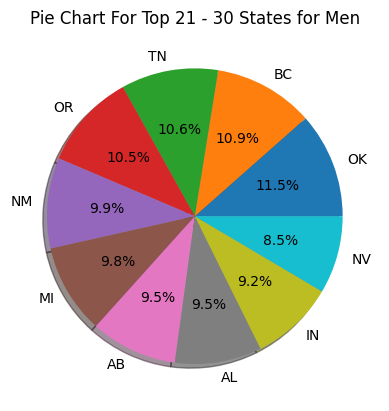

In [30]:
print(list(df))
print(tabulate(df1.iloc[20:30], headers='keys', tablefmt='plain'))
df_state_men = {"OK": 5075, "BC": 4823, "TN": 4680, "OR": 4632, "NM": 4364,
                    "MI": 4330, "AB": 4184, "AL": 4184, "IN": 4036, "NV": 3746}
plt.pie(list(df_state_men.values()), labels=df_state_men.keys(), autopct='%2.1f%%', shadow=True, startangle=0)
plt.axis("on")
plt.title("Pie Chart For Top 21 - 30 States for Men")
plt.show()

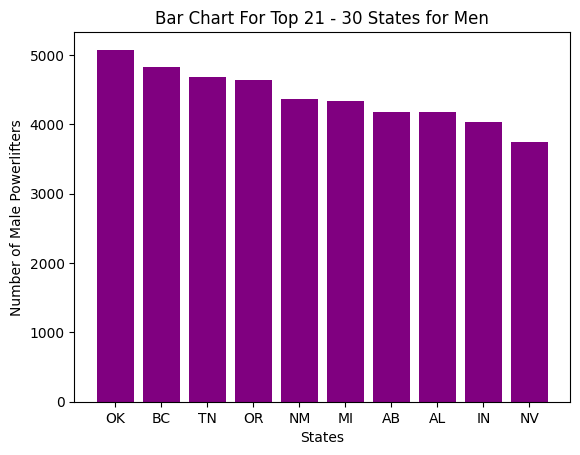

In [35]:
df_state_men = {"OK": 5075, "BC": 4823, "TN": 4680, "OR": 4632, "NM": 4364,
                    "MI": 4330, "AB": 4184, "AL": 4184, "IN": 4036, "NV": 3746}
plt.bar(df_state_men.keys(), df_state_men.values(), color="purple")
plt.xlabel("States")
plt.ylabel("Number of Male Powerlifters")
plt.title("Bar Chart For Top 21 - 30 States for Men")
plt.xticks(rotation=0)
plt.show()

***4. Plot pie chart and bar chart for Women Top 21-30 states (inclusive).
   (Plot one with Matplotlib and one with Seaborn)***

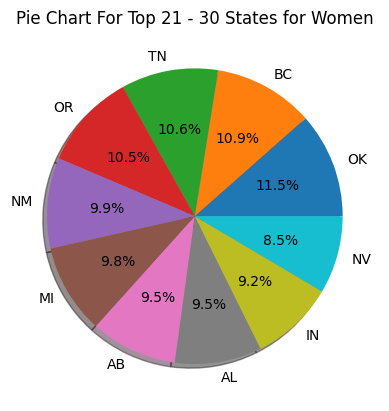

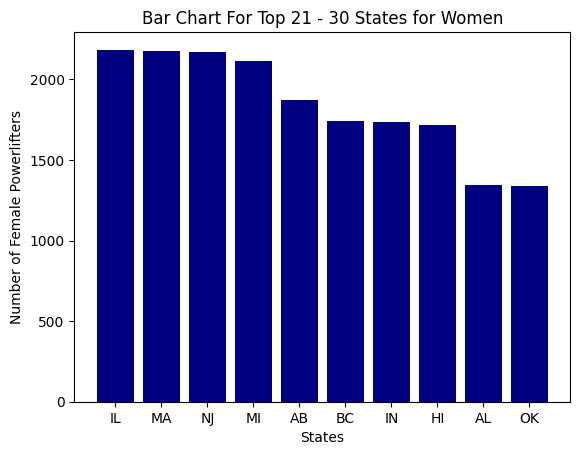

In [37]:
df_state_women = {"IL": 2184, "MA": 2174, "NJ": 2169, "MI": 2115, "AB": 1870,
                      "BC": 1744, "IN": 1733, "HI": 1717, "AL": 1343, "OK": 1337}
plt.pie(list(df_state_men.values()), labels=df_state_men.keys(), autopct='%2.1f%%', shadow=True, startangle=0)
plt.axis("on")
plt.title("Pie Chart For Top 21 - 30 States for Women")
plt.show()
plt.bar(df_state_women.keys(), df_state_women.values(), color="navy")
plt.xlabel("States")
plt.ylabel("Number of Female Powerlifters")
plt.title("Bar Chart For Top 21 - 30 States for Women")
plt.xticks(rotation=0)
plt.show()